In [2]:
import pandas as pd

df = pd.read_csv('../results/sample_once_train_10k/lower_lr.csv', index_col=0)
df.sort_values(by=['method', 'influence_sign', 'seed', 'ratio', 'model_version', 'n_iterations', 'hard_constrained'], inplace=True)

# I ran some experiments twice because I set different influence signs for random and RAR aswell
# this drops all rows with EXACT duplicates
df.loc[df['method'] != 'IF', 'influence_sign'] = "abs"
df.drop_duplicates(inplace=True, keep='first')

In [8]:
subset = df.loc[
    (df['method'] == "IF") &
    (df['influence_sign'] == "abs") &
    (df['seed'] == 0) &
    (df['ratio'] == 0.1) &
    (df['model_version'] == "10k") &
    (df['n_iterations'] == 10000) 
]

In [2]:
print("Checking all runs")
print("In case of a run missing please use the following args to create run:\n\n")
missing = 0
for method in df['method'].unique():
    for ratio in df['ratio'].unique():
        for seed in df['seed'].unique():
            for n_iter in df['n_iterations'].unique():
                for hard_constrained in df['hard_constrained'].unique():
                    if method == 'IF':
                        for infl_sign in df['influence_sign'].unique():
                            printed = False 
                            for model_version in df['model_version'].unique():
                                subset = df.loc[
                                    (df['method'] == method) &
                                    (df['influence_sign'] == infl_sign) &
                                    (df['seed'] == seed) &
                                    (df['ratio'] == ratio) &
                                    (df['model_version'] == model_version) &
                                    (df['n_iterations'] == n_iter) &
                                    (df['hard_constrained'] == hard_constrained)
                                ]

                                if subset.empty:
                                    job = f'--ratio {ratio} --method {method} --n_iterations {n_iter} --seed {seed} --influence_sign {infl_sign}' 
                                    if hard_constrained:
                                        job += ' --hard_constrained'

                                    if not printed:
                                        print(job)
                                        printed = True
                    else:
                        subset = df.loc[
                                    (df['method'] == method) &
                                    (df['seed'] == seed) &
                                    (df['ratio'] == ratio) &
                                    (df['model_version'] == model_version) &
                                    (df['n_iterations'] == n_iter) &
                                    (df['hard_constrained'] == hard_constrained)
                                ]
                        
                        if subset.empty:
                            job = f'--ratio {ratio} --method {method} --n_iterations {n_iter} --seed {seed} --influence_sign {infl_sign}' 
                            if hard_constrained:
                                job += ' --hard_constrained'
                            print(job)

Checking all runs
In case of a run missing please use the following args to create run:




In [7]:
# check for duplicate entries with different results
print("\n\nChecking for duplicates")
for method in df['method'].unique():
    for ratio in df['ratio'].unique():
        for seed in df['seed'].unique():
            for n_iter in df['n_iterations'].unique():
                for hard_constrained in df['hard_constrained'].unique():
                    for infl_sign in df['influence_sign'].unique():
                        for model_version in df['model_version'].unique():
                            for replace in df['replace'].unique():
                                subset = df.loc[
                                    (df['method'] == method) &
                                    (df['seed'] == seed) &
                                    (df['ratio'] == ratio) &
                                    (df['model_version'] == model_version) &
                                    (df['n_iterations'] == n_iter) &
                                    (df['hard_constrained'] == hard_constrained) & 
                                    (df['influence_sign'] == infl_sign) &
                                    (df['replace'] == replace)
                                ]

                            if subset.shape[0] > 1:
                                print(f"Duplicate: {method}, {infl_sign}, {seed}, {ratio}, {model_version}, {n_iter}, {hard_constrained}")



Checking for duplicates


# ABSOLUTE IF

n_iter: 1000, hard_constrained: True


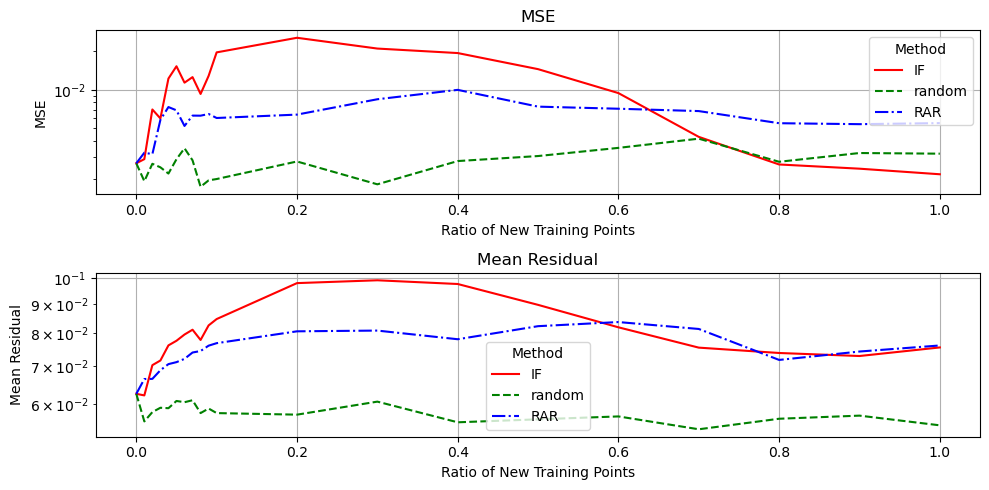

n_iter: 10000, hard_constrained: True


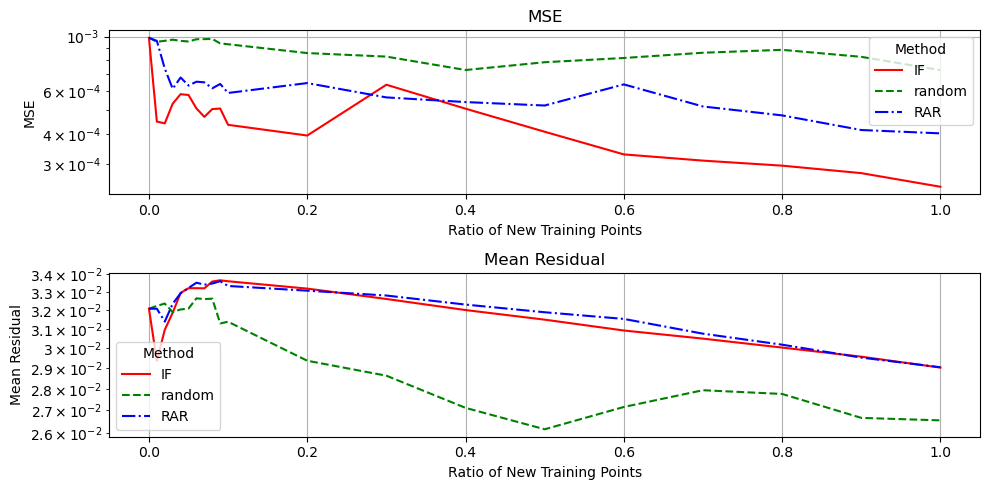

n_iter: 50000, hard_constrained: True


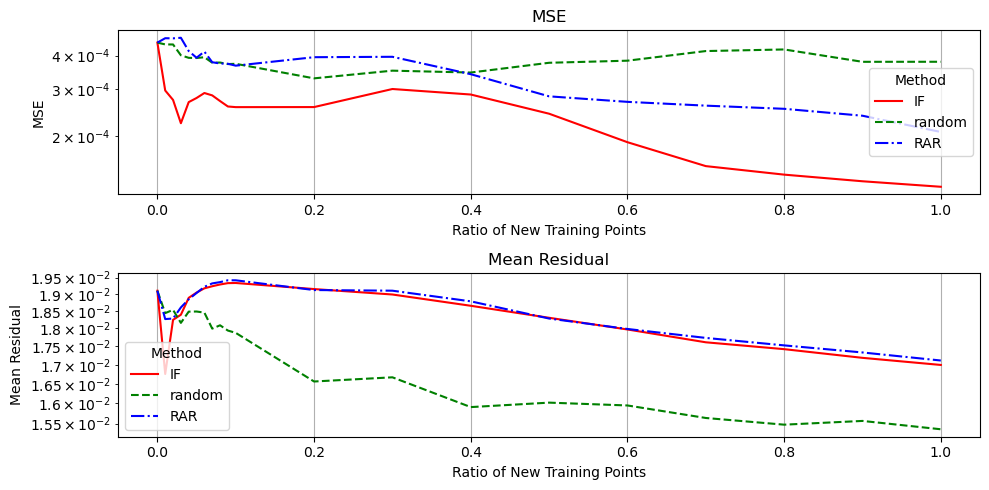

In [17]:
infl_sign = 'abs'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df = pd.read_csv('../results/sample_once_train_10k/lower_lr.csv', index_col=0)
df.sort_values(by=['method', 'influence_sign', 'seed', 'ratio', 'model_version', 'n_iterations', 'hard_constrained'], inplace=True)

# I ran some experiments twice because I set different influence signs for random and RAR aswell
# this drops all rows with EXACT duplicates
df.loc[df['method'] != 'IF', 'influence_sign'] = infl_sign
df.drop_duplicates(inplace=True, keep='first')

df = df.loc[(df['influence_sign'] == infl_sign) & (df['model_version'] == 'test') & (df['replace'] == False)]
hard_constrained = True

# Assuming 'df' is your DataFrame already loaded
for n_iter in [1000, 10000, 50000]:
    # for hard_constrained in [True, False]:
        print(f"n_iter: {n_iter}, hard_constrained: {hard_constrained}")
        # Filter the DataFrame
        sub_df = df.loc[
            (df['model_version'] == 'test') &
            (df['n_iterations'] == n_iter) &
            (df['hard_constrained'] == hard_constrained)
        ]

        # Group by 'method' and 'ratio' and calculate the mean and standard deviation
        # We'll include 'control' in our methods list
        methods = ['IF', 'random', 'RAR']
        grouped = sub_df.groupby(['method', 'ratio'])
        mean_df = grouped[['mse', 'l2_relative_error', 'mean_residual']].mean().reset_index()
        std_df = grouped[['mse', 'l2_relative_error', 'mean_residual']].std().reset_index()

        # Define your methods, colors, and styles
        method_colors = {'IF': 'r', 'random': 'g', 'RAR': 'b',}
        method_styles = {'IF': '-', 'random': '--', 'RAR': '-.',}

        metrics = ['mse', 'mean_residual']#, 'l2_relative_error']
        metric_labels = {
            'mse': 'MSE',
            'mean_residual': 'Mean Residual',
            'l2_relative_error': 'L2 Relative Error'
        }

        # Create custom legend elements for methods
        method_legend_elements = [
            Line2D([0], [0], color=method_colors[method], linestyle=method_styles[method], label=method)
            for method in methods
        ]

        fig, ax = plt.subplots(nrows=2, figsize=(10, 5))

        for e, metric in enumerate(metrics):
            for method in methods:
                method_mean = mean_df[mean_df['method'] == method]
                method_std = std_df[std_df['method'] == method]

                color = method_colors[method]
                line_style = method_styles[method]

                ax[e].plot(method_mean['ratio'], method_mean[metric], color=color, linestyle=line_style)
                # ax[e].fill_between(
                #     method_mean['ratio'],
                #     method_mean[metric] - method_std[metric],
                #     method_mean[metric] + method_std[metric],
                #     color=color, alpha=0.1
                # )

            ax[e].set_title(metric_labels[metric])
            ax[e].set_xlabel('Ratio of New Training Points')
            ax[e].set_ylabel(metric_labels[metric])
            ax[e].set_yscale('log')
            ax[e].grid()
            # Add custom legend
            ax[e].legend(handles=method_legend_elements, title='Method')

        plt.tight_layout()
        plt.show()

In [20]:
df.groupby(['n_iterations', 'method', 'ratio'])['epoch'].mean().unstack()

ratio                  0.00    0.01    0.02    0.03    0.04    0.05    0.06  \
n_iterations method                                                           
1000         IF      9367.2  9978.0  9817.6  9972.3  9836.6  9996.0  9968.3   
             RAR     9367.2  9801.9  9970.1  9950.7  9914.7  9985.4  9800.5   
             random  9367.2  9881.0  9689.3  9762.2  9846.9  9760.1  9940.2   
10000        IF      5327.2  9901.2  9954.8  9956.0  9950.6  9932.8  9953.3   
             RAR     5327.2  8092.2  9929.9  9932.8  9931.4  9949.3  9949.7   
             random  5327.2  5027.4  4878.6  5236.3  4988.8  4971.0  4910.3   
50000        IF      3150.9  9938.7  9369.0  9974.4  9963.8  9962.0  9959.8   
             RAR     3150.9  8143.7  9947.3  9934.3  9919.0  9933.0  9924.3   
             random  3150.9  5101.0  4135.7  5309.2  4374.6  4221.5  4354.3   

ratio                  0.07    0.08    0.09    0.10    0.20    0.30    0.40  \
n_iterations method                                                           
1000         IF      9965.5  9934.0  9987.6  9982.8  9999.9  9999.8  9999.6   
             RAR     9810.1  9888.6  9925.3  9887.3  9999.7  9772.1  9776.0   
             random  9885.6  9972.9  9756.9  9842.9  9725.9  9568.7  9791.3   
10000        IF      9975.1  9942.0  9962.2  9963.3  9964.2  9979.6  9957.9   
             RAR     9968.3  9944.8  9977.3  9988.6  9984.6  9962.1  9934.8   
             random  4884.7  4851.2  5915.0  5800.9  7173.3  7162.8  7810.2   
50000        IF      9930.6  9976.1  9959.7  9940.1  9963.2  9971.7  9961.2   
             RAR     9951.0  9927.0  9944.4  9923.5  9928.2  9951.1  9899.6   
             random  4373.8  4093.7  4543.2  4716.3  7464.3  6317.4  7636.6   

ratio                  0.50    0.60    0.70    0.80    0.90    1.00  
n_iterations method                                                  
1000         IF      9981.5  9994.5  9995.5  9969.6  9999.3  9786.8  
             RAR     9310.8  9018.3  9344.4  9784.0  9472.4  9285.5  
             random  9965.9  9647.2  9982.3  9860.1  9975.0  9992.5  
10000        IF      9975.7  9938.6  9980.5  9979.6  9949.7  9924.1  
             RAR     9949.6  9955.6  9959.5  9961.4  9969.8  9973.5  
             random  8784.3  8149.1  7605.5  7789.8  8970.0  8832.3  
50000        IF      9932.8  9912.7  9941.8  9916.3  9915.5  9930.0  
             RAR     9954.3  9916.7  9961.7  9896.2  9900.7  9904.9  
             random  6147.2  7203.6  7821.5  8247.9  7881.1  8195.3

# REPLACE TRAINING DATA 

n_iter: 1000, hard_constrained: True


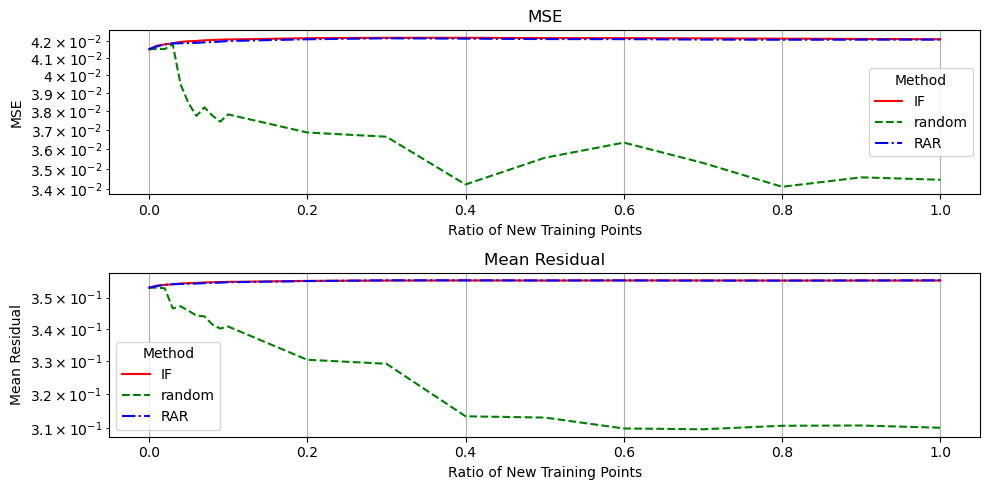

n_iter: 10000, hard_constrained: True


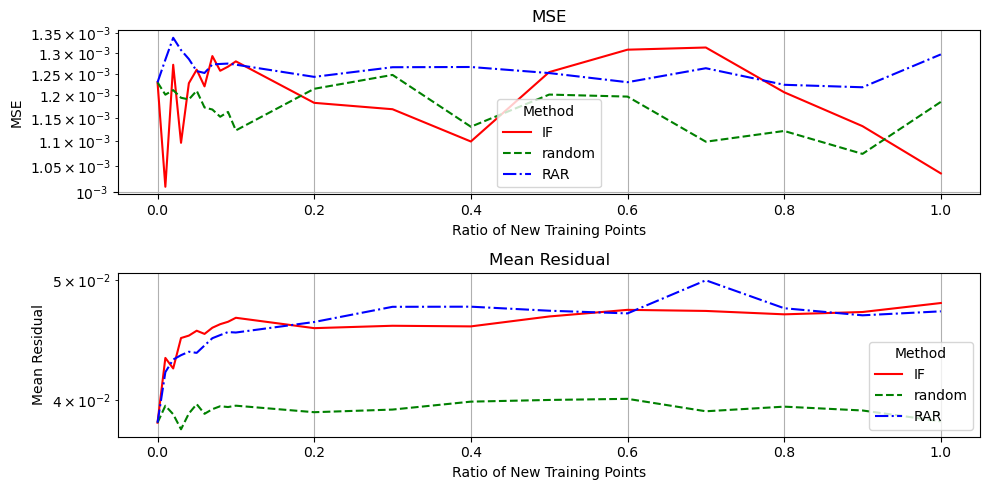

n_iter: 50000, hard_constrained: True


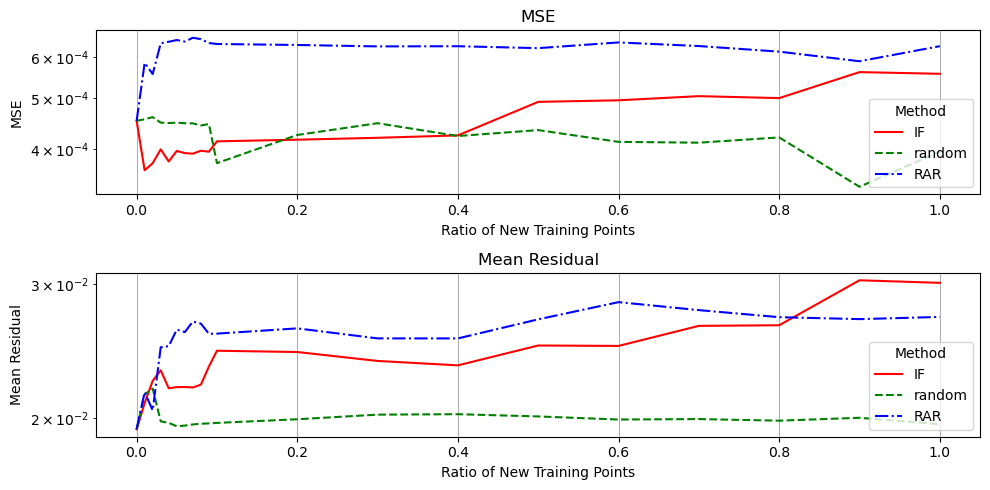

In [11]:
infl_sign = 'abs'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df = pd.read_csv('../results/sample_once_train_10k/lower_lr.csv', index_col=0)
df.sort_values(by=['method', 'influence_sign', 'seed', 'ratio', 'model_version', 'n_iterations', 'hard_constrained'], inplace=True)

# I ran some experiments twice because I set different influence signs for random and RAR aswell
# this drops all rows with EXACT duplicates
df.loc[df['method'] != 'IF', 'influence_sign'] = infl_sign
df.drop_duplicates(inplace=True, keep='first')

df = df.loc[(df['influence_sign'] == infl_sign) & (df['model_version'] == 'test') & (df['replace'] == True)]
hard_constrained = True

# Assuming 'df' is your DataFrame already loaded
for n_iter in [1000, 10000, 50000]:
    # for hard_constrained in [True, False]:
        print(f"n_iter: {n_iter}, hard_constrained: {hard_constrained}")
        # Filter the DataFrame
        sub_df = df.loc[
            (df['model_version'] == 'test') &
            (df['n_iterations'] == n_iter) &
            (df['hard_constrained'] == hard_constrained) 
        ]

        # Group by 'method' and 'ratio' and calculate the mean and standard deviation
        # We'll include 'control' in our methods list
        methods = ['IF', 'random', 'RAR']
        grouped = sub_df.groupby(['method', 'ratio'])
        mean_df = grouped[['mse', 'l2_relative_error', 'mean_residual']].mean().reset_index()
        std_df = grouped[['mse', 'l2_relative_error', 'mean_residual']].std().reset_index()

        # Define your methods, colors, and styles
        method_colors = {'IF': 'r', 'random': 'g', 'RAR': 'b',}
        method_styles = {'IF': '-', 'random': '--', 'RAR': '-.',}

        metrics = ['mse', 'mean_residual']#, 'l2_relative_error']
        metric_labels = {
            'mse': 'MSE',
            'mean_residual': 'Mean Residual',
            'l2_relative_error': 'L2 Relative Error'
        }

        # Create custom legend elements for methods
        method_legend_elements = [
            Line2D([0], [0], color=method_colors[method], linestyle=method_styles[method], label=method)
            for method in methods
        ]

        fig, ax = plt.subplots(nrows=2, figsize=(10, 5))

        for e, metric in enumerate(metrics):
            for method in methods:
                method_mean = mean_df[mean_df['method'] == method]
                method_std = std_df[std_df['method'] == method]

                color = method_colors[method]
                line_style = method_styles[method]

                ax[e].plot(method_mean['ratio'], method_mean[metric], color=color, linestyle=line_style)
                # ax[e].fill_between(
                #     method_mean['ratio'],
                #     method_mean[metric] - method_std[metric],
                #     method_mean[metric] + method_std[metric],
                #     color=color, alpha=0.1
                # )

            ax[e].set_title(metric_labels[metric])
            ax[e].set_xlabel('Ratio of New Training Points')
            ax[e].set_ylabel(metric_labels[metric])
            ax[e].set_yscale('log')
            ax[e].grid()
            # Add custom legend
            ax[e].legend(handles=method_legend_elements, title='Method')

        plt.tight_layout()
        plt.show()